## Linear Regression vs. Logistic Regression

Trong Linear Regression, chúng ta đã học cách predict số tiền hàng năm 1 người phải trả bằng thuật toán `linear regression`.

Trong bài này, ta sẽ học cách sử dụng `logistics regression` - 1 thuật toán phù hợp hơn để xử lý các bài toán **binary classification**. Ví dụ trong bài này là "Liệu rằng ngày mai có mưa không?"

Vì vậy, phân biệt bài toán này nên là `regression` hay `classification` cũng là 1 yếu tố quan trọng đầu tiên trong Machine Learning.

### Classification Problems


Problems where each input must be assigned a discrete category (also called label or class) are known as _classification problems_. 

Here are some examples of classification problems:

- [Rainfall prediction](https://kaggle.com/jsphyg/weather-dataset-rattle-package): Predicting whether it will rain tomorrow using today's weather data (classes are "Will Rain" and "Will Not Rain")
- [Breast cancer detection](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data): Predicting whether a tumor  is "benign" (noncancerous) or "malignant" (cancerous) using information like its radius, texture etc.
- [Loan Repayment Prediction](https://www.kaggle.com/c/home-credit-default-risk) - Predicting whether applicants will repay a home loan based on factors like age, income, loan amount, no. of children etc.
- [Handwritten Digit Recognition](https://www.kaggle.com/c/digit-recognizer) - Identifying which digit from 0 to 9 a picture of handwritten text represents.

Classification problems can be binary (yes/no) or multiclass (picking one of many classes).

### Regression Problems

Problems where a continuous numeric value must be predicted for each input are known as _regression problems_.

Here are some example of regression problems:

- [Medical Charges Prediction](https://www.kaggle.com/subhakarks/medical-insurance-cost-analysis-and-prediction)
- [House Price Prediction](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) 
- [Ocean Temperature Prediction](https://www.kaggle.com/sohier/calcofi)
- [Weather Temperature Prediction](https://www.kaggle.com/budincsevity/szeged-weather)

### Logistic Regression for Solving Classification Problems

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">


The output of the sigmoid function is called a logistic, hence the name _logistic regression_. For a mathematical discussion of logistic regression, sigmoid activation and cross entropy, check out [this YouTube playlist](https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy&index=1). Logistic regression can also be applied to multi-class classification problems, with a few modifications.

### Machine Learning Workflow

Khi xử lý `regression` hay `classification` thì workflow tương tự nhau. Bao gồm 5 bước:

1. Tạo ra 1 model với các tham số $w$ và $b$ ($weights$ & $biases$) ngẫu nhiên 

2. Đưa vào 1 số các inputs để cho ra predictions.

3. Sử dụng *loss function* để so sánh targets và predictions

4. Optimize sử dụng least squares, gradient descent, ... để giảm *loss* bằng cách thay đổi $weights$ và $biases$ của model.

5. Lặp lại các bước 1-4 tới khi có kết quả đủ tốt thì dừng lại.

Mô tả:

<img src="https://i.imgur.com/g32CoIy.png" width="480">


`Classification` và `regression` đều là **supervised machine learning**, vì chúng áp dụng cho **labeled data**. Machine learning áp dụng **unlabeled data** thì gọi là unsupervised learning ([image source](https://au.mathworks.com/help/stats/machine-learning-in-matlab.html)). 

<img src="https://i.imgur.com/1EMQmAw.png" width="480">


Chúng ta sẽ học cách sử dụng `logistic regression` trong tệp dữ liệu về Thời tiết tại Australia để dự đoán ngày mai có mưa hay không. Đây là 1 bài toán `binary classification`.

Import `scikit-learn` và xử lý tiếp thôi!

In [224]:
import pandas as pd 
import numpy as np

In [225]:
pd.set_option('display.max_columns', 25)

In [226]:
raw_df = pd.read_csv('./dataset/weatherAUS.csv')
raw_df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [227]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Có thể thấy dữ liệu khá nhiều null, nên cần phải xử lý null, fill các missing values. Tuy nhiên cần dropna cho 2 cột là 

- RainToday

- RainTomorrow

Vì *RainTomorrow là target*; còn RainToday cũng gần sát nghĩa với target

In [228]:
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

In [229]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [230]:
px.histogram(raw_df, x='Location', title='Location vs. Rainy Days', color='RainToday')

Có thể thấy, dữ liệu phản ánh đúng độ dài các quan sát thu thập hàng ngày xuyên suốt 9 - 10 năm tại các vị trí địa lý, location khác nhau

Phân phối khá đồng đều, mỗi nơi có khoảng 3000 quan sát. Ngoại trừ 1 số vị trí như Nhil, Uluru, .. có ít quan sát hơn thì có thể do 1 số lí do:

- Họ mãi mới có đài quan sát khí tượng

- Họ bị thiếu dữ liệu, không ghi chép được

In [231]:
px.histogram(raw_df, 
             x='Temp3pm', 
             title='Temperature at 3 pm vs. Rain Tomorrow', 
             color='RainTomorrow')

Giả định đặt ra: "Nhiệt độ lúc 3PM hôm nay có thể gây ảnh hưởng tới khả năng mưa của ngày hôm sau"

- Kết quả trả về dường như xác nhận giả định có tính chính xác khi nhiệt độ càng thấp, phân bổ Gauss có mean ~20 độ thì ngày hôm sau sẽ mưa

In [232]:
px.histogram(raw_df, 
             x='RainTomorrow', 
             color='RainToday', 
             title='Rain Tomorrow vs. Rain Today')

Dữ liệu đang bị imbalance. Tại nhóm RainToday = No

In [233]:
px.scatter(raw_df.sample(2000), 
           title='Min Temp. vs Max Temp.',
           x='MinTemp', 
           y='MaxTemp', 
           color='RainToday')

In [234]:
px.scatter(raw_df.sample(2000), 
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow')

Nếu Temp3PM thấp, Humidity3PM cao thì khả năng mưa của ngày mai là cao

## Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - để train model, tính toán loss, điều chỉnh tham số $weight (w)$ bằng cách sử dụng các phương pháp Optimize

2. **Validation set** - để đánh giá model, tune hyperparameters (sử dụng các optimization technique, regularization ...). Từ đó, chọn được version tốt nhất của model. Chọn tệp validation tốt cũng là 1 điều cần thiết để train model tốt. [Learn more here.](https://www.fast.ai/2017/11/13/validation-sets/)

3. **Test set** - để so sánh các models, cách tiếp cận khác nhau và báo cáo về kết quả accuracy cuối cùng giữa chúng. Với nhiều tệp dataset, test sets được cung cấp riêng. Chúng nên được cung cấp gần giống các tệp training, càng phản ánh thực tế càng tốt.

<img src="https://i.imgur.com/j8eITrK.png" width="480">

**Quy tắc:**
- 60% train + 20% valid + 20% test
- Nếu test được cung cấp riêng: 75% train, 25% test

Sử dụng `train_test_split` để lấy ngẫu nhiên các dòng dữ liệu cho valid và test. 

[Đọc thêm về train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [235]:
import warnings
from pandas.errors import PerformanceWarning
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=PerformanceWarning)

In [236]:
from sklearn.model_selection import train_test_split

In [237]:
train_val_df, test_df = train_test_split(raw_df, test_size= 0.2, random_state= 42)
train_df, val_df = train_test_split(train_val_df, test_size= 0.25, random_state= 42)

In [238]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (84471, 23)
val_df.shape : (28158, 23)
test_df.shape : (28158, 23)


However, while working with dates, it's often a better idea to separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.

For the current dataset, we can use the Date column in the dataset to create another column for year. We'll pick the last two years for the test set, and one year before it for the validation set.


Khi làm việc với thời gian, ta cũng có thể chia train - val - test theo chuỗi thời gian. Từ đó, model cũng sẽ được train với dữ liệu quá khứ và đánh giá được tương lai.

Với tệp dữ liệu hiện tại, xem phân bổ số dòng dữ liệu của các năm trong raw_df, từ đó đưa ra các khoảng train-val-test phù hợp

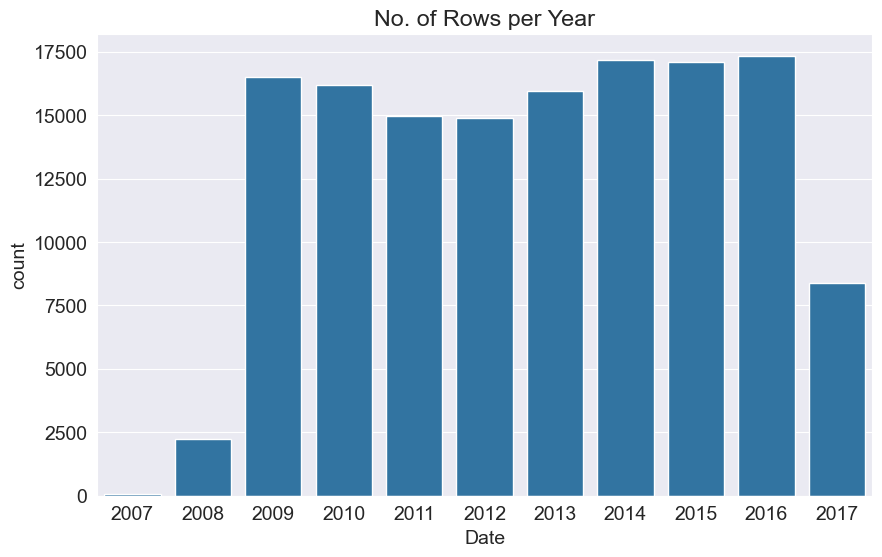

In [239]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df['Date']).dt.year)
plt.show()

In [240]:
year = pd.to_datetime(raw_df['Date']).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [241]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (97988, 23)
val_df.shape : (17089, 23)
test_df.shape : (25710, 23)


### Tìm inputs và targets

In [242]:
raw_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [243]:
input_cols = ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday']

target_col = 'RainTomorrow'

In [244]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [245]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [246]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [247]:
import numpy as np 

In [248]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [249]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

In [250]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

## Imputing Missing Numeric Data

Machine learning không thể làm việc với missing numerical data. Quá trình fill missing value gọi là `imputation`.

<img src="https://i.imgur.com/W7cfyOp.png" width="480">

Có nhiều kĩ thuật `imputation`, nhưng ở đây lựa chọn kĩ thuật đơn giản nhất: thay thế bằng giá trị trung bình (mean/avg) sử dụng `SimpleImputer` từ `sklearn.impute`.

In [251]:
from sklearn.impute import SimpleImputer

In [252]:
imputer = SimpleImputer(strategy='mean')

In [253]:
raw_df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [254]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

In [255]:
list(imputer.statistics_)

[12.18482386562048,
 23.235120301822324,
 2.349974074310839,
 5.472515506887154,
 7.630539861047281,
 39.97051988882308,
 13.990496092519967,
 18.631140782316862,
 68.82683277087672,
 51.44928834695453,
 1017.6545771543717,
 1015.2579625879797,
 4.431160817585808,
 4.499250233195188,
 16.98706638787991,
 21.69318269001107]

In [256]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

### Feature Scaling

In [257]:
raw_df[numeric_cols].describe()

MinTemp       MaxTemp       Rainfall   Evaporation      Sunshine  \
count  140319.000000  140480.00000  140787.000000  81093.000000  73982.000000   
mean       12.184824      23.23512       2.349974      5.472516      7.630540   
std         6.403879       7.11450       8.465173      4.189132      3.781729   
min        -8.500000      -4.80000       0.000000      0.000000      0.000000   
25%         7.600000      17.90000       0.000000      2.600000      4.900000   
50%        12.000000      22.60000       0.000000      4.800000      8.500000   
75%        16.800000      28.30000       0.800000      7.400000     10.700000   
max        33.900000      48.10000     371.000000    145.000000     14.500000   

       WindGustSpeed   WindSpeed9am   WindSpeed3pm    Humidity9am  \
count  131682.000000  139732.000000  138256.000000  139270.000000   
mean       39.970520      13.990496      18.631141      68.826833   
std        13.578201       8.886210       8.798096      19.063650   
min         6.000000       0.000000       0.000000       0.000000   
25%        31.000000       7.000000      13.000000      57.000000   
50%        39.000000      13.000000      19.000000      70.000000   
75%        48.000000      19.000000      24.000000      83.000000   
max       135.000000     130.000000      87.000000     100.000000   

         Humidity3pm    Pressure9am    Pressure3pm      Cloud9am  \
count  137286.000000  127044.000000  127018.000000  88162.000000   
mean       51.449288    1017.654577    1015.257963      4.431161   
std        20.807310       7.104867       7.035411      2.886594   
min         0.000000     980.500000     977.100000      0.000000   
25%        37.000000    1013.000000    1010.400000      1.000000   
50%        52.000000    1017.600000    1015.200000      5.000000   
75%        66.000000    1022.400000    1020.000000      7.000000   
max       100.000000    1041.000000    1039.600000      9.000000   

           Cloud3pm        Temp9am        Temp3pm  
count  84693.000000  140131.000000  138163.000000  
mean       4.499250      16.987066      21.693183  
std        2.719752       6.496012       6.937784  
min        0.000000      -7.200000      -5.400000  
25%        2.000000      12.300000      16.600000  
50%        5.000000      16.700000      21.100000  
75%        7.000000      21.600000      26.400000  
max        9.000000      40.200000      46.700000

Các cột có các khoảng giá trị rất khác nhau, cần đưa về range (0,1) sử dụng `MinMaxScaler`

In [258]:
from sklearn.preprocessing import MinMaxScaler

In [259]:
scaler = MinMaxScaler()

Sau đó:
- `fit`: cho đi học
- `transform`: về dạy lại

In [260]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [261]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [262]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.483689      0.525947      0.006396      0.036949      0.525366   
std        0.149458      0.131904      0.022962      0.021628      0.200931   
min        0.000000      0.013233      0.000000      0.000000      0.000000   
25%        0.377358      0.429112      0.000000      0.026207      0.517241   
50%        0.478774      0.514178      0.000000      0.037741      0.526244   
75%        0.591981      0.618147      0.002156      0.038621      0.634483   
max        1.000000      1.000000      1.000000      0.568276      0.986207   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean        0.265107      0.108395      0.215668      0.686309      0.514693   
std         0.102420      0.068800      0.101424      0.189008      0.206376   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.193798      0.053846      0.149425      0.570000      0.370000   
50%         0.255814      0.100000      0.218391      0.690000      0.520000   
75%         0.310078      0.146154      0.275862      0.830000      0.650000   
max         1.000000      0.669231      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.612014      0.608705      0.483192      0.493693      0.507089   
std        0.111335      0.106611      0.255486      0.238028      0.134722   
min        0.000000      0.030400      0.000000      0.000000      0.027426   
25%        0.543802      0.540800      0.333333      0.333333      0.409283   
50%        0.614125      0.610527      0.492351      0.499917      0.502110   
75%        0.682645      0.675200      0.666667      0.666667      0.601266   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Temp3pm  
count  97988.000000  
mean       0.517103  
std        0.130726  
min        0.005758  
25%        0.422265  
50%        0.506718  
75%        0.604607  
max        0.988484

### Encoding categorical columns

In [263]:
from sklearn.preprocessing import OneHotEncoder

In [264]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [265]:
encoder.fit(raw_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [266]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [267]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [268]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [269]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (97988, 123)
train_targets: (97988,)
val_inputs: (17089, 123)
val_targets: (17089,)
test_inputs: (25710, 123)
test_targets: (25710,)


### Logistics Regression

In [270]:
from sklearn.linear_model import LogisticRegression

In [271]:
model_lr = LogisticRegression(solver='liblinear')

In [272]:
model_lr.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

### Prediction and Evaluation

In [273]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

Dự báo predictions cho tệp train

In [274]:
train_preds = model_lr.predict(X_train)
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

Thực hiện **probabilistic prediction** bằng `predict_proba`

In [275]:
train_probs = model_lr.predict_proba(X_train)
train_probs

array([[0.9440505 , 0.0559495 ],
       [0.94072044, 0.05927956],
       [0.96096348, 0.03903652],
       ...,
       [0.98748974, 0.01251026],
       [0.9833393 , 0.0166607 ],
       [0.87427127, 0.12572873]])

Phía trên là prob của 2 class tương ứng là "No" và "Yes". Kiểm tra lại bằng cách:

In [276]:
model_lr.classes_

array(['No', 'Yes'], dtype=object)

So sánh accuracy bằng cách so sánh train_preds và train_targets.

Sử dụng hàm `accuracy_score` và `confusion_matrix` trong `sklearn.metrics`

In [277]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [278]:
accuracy_score(train_targets, train_preds)

0.8519002326815528

Model độ chính xác >85%. Điều này có thể được trực quan hóa bằng `Confusion Matrix`:

<img src="https://i.imgur.com/UM28BCN.png" width="480">

In [279]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.94620029, 0.05379971],
       [0.47770438, 0.52229562]])

In [280]:
def predict_and_plot(inputs, targets, name=''):
    preds = model_lr.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure(figsize = (6,3))
    sns.heatmap(cf, annot=True, cmap = 'RdBu')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 85.19%


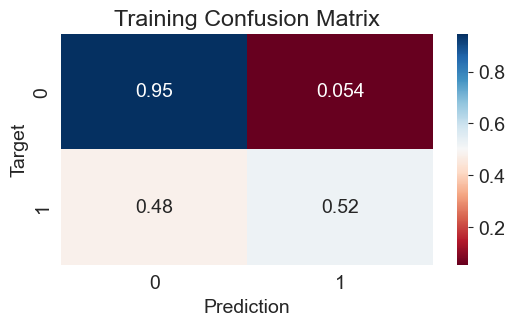

In [281]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 85.41%


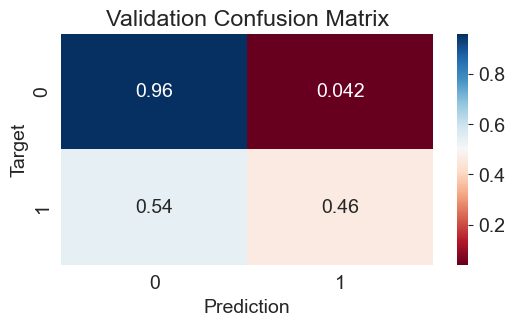

In [282]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation')

Accuracy: 84.22%


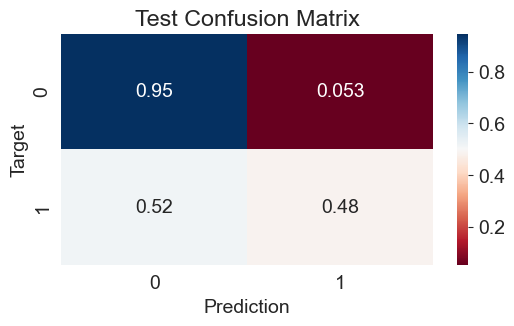

In [283]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

Model chính xác 84% khi chạy trên tệp test và tệp validation. Chứng tỏ rằng, model khá tốt với những dữ liệu mà nó chưa từng nhìn thấy. 

Điều này tốt hay xấu thì phụ thuộc vào bản chất của vấn đề và business requirements.

Một cách để verify model có tốt thật hay không là sử dụng:

- "Random" model: Đoán bừa

- "Dumb" model: Luôn trả lời là "No"

Cả 2 loại model này đều bỏ qua hoàn toàn các inputs được đưa vào.

In [284]:
def random_guess(inputs):
    return np.random.choice(['No', 'Yes'], size = len(inputs))

In [285]:
def all_no(inputs):
    return np.full(len(inputs), "No")

In [286]:
random_guess(X_val)

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype='<U3')

In [287]:
all_no(X_val)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U2')

In [288]:
accuracy_score(test_targets, random_guess(X_test))

0.5041618047452353

In [289]:
accuracy_score(test_targets, all_no(X_test))

0.7734344612991054

Như vậy, `model_lr` của ta tốt hơn `random_guess` và `all_no`. Trong thực tế không phải lúc nào cũng như vậy.

Nhưng đây cũng là 1 cách để kiểm chứng model có thực sự tốt hay không bằng cách so sánh model được train so với những model baselines

### Kiểm tra model với 1 input thử

In [290]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

new_input_df = pd.DataFrame([new_input])
new_input_df

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2021-06-19  Katherine     23.2     33.2      10.2          4.2       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0         NNW           52.0         NW        NNE          13.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          20.0         89.0         58.0       1004.8       1001.5       8.0   

   Cloud3pm  Temp9am  Temp3pm RainToday  
0       5.0     25.7     33.0       Yes

In [291]:
new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])

In [292]:
X_new_input = new_input_df[numeric_cols + encoded_cols]
X_new_input

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.747642  0.718336  0.027493     0.028966  0.526244       0.356589   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           0.1      0.229885         0.89         0.58     0.401653   

   Pressure3pm  ...  WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  \
0       0.3904  ...            0.0           0.0            0.0   

   WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
0             0.0             0.0            0.0           0.0   

   WindDir3pm_WNW  WindDir3pm_WSW  WindDir3pm_nan  RainToday_No  RainToday_Yes  
0             0.0             0.0             0.0           0.0            1.0  

[1 rows x 118 columns]

In [293]:
prediction = model_lr.predict(X_new_input)[0]
prediction

'Yes'

In [294]:
prob = model_lr.predict_proba(X_new_input)[0]
prob

array([0.48136945, 0.51863055])

In [295]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model_lr.predict(X_input)[0]
    prob = model_lr.predict_proba(X_input)[0][list(model_lr.classes_).index(pred)]
    return pred, prob

In [296]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

predict_input(new_input)

('Yes', 0.6476529695007345)

### Save model to joblib

In [297]:
import joblib

Lưu các thông tin cần thiết

In [299]:
aussie_rain = {
    'model': model_lr,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

Save vào joblib

In [302]:
joblib.dump(aussie_rain, './joblib/aussie_rain.joblib')

['./joblib/aussie_rain.joblib']

Chạy thử joblib đã lưu

In [303]:
aussie_rain2 = joblib.load('./joblib/aussie_rain.joblib')

In [304]:
test_preds2 = aussie_rain2['model'].predict(X_test)
accuracy_score(test_targets, test_preds2)

0.8421625826526643

Kết quả đã ra giống original model ^^

### **References**

Check out the following resources to learn more:

* https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy&index=1
* https://www.kaggle.com/prashant111/extensive-analysis-eda-fe-modelling
* https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction#Baseline
* https://jovian.ai/aakashns/03-logistic-regression


Try training logistic regression models on the following datasets:

- [Breast cancer detection](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data): Predicting whether a tumor  is "benign" (noncancerous) or "malignant" (cancerous) using information like its radius, texture etc.
- [Loan Repayment Prediction](https://www.kaggle.com/c/home-credit-default-risk) - Predicting whether applicants will repay a home loan based on factors like age, income, loan amount, no. of children etc.
- [Handwritten Digit Recognition](https://www.kaggle.com/c/digit-recognizer) - Identifying which digit from 0 to 9 a picture of handwritten text represents.